In [8]:
#this defaults plots to matplotlib 1.0 formatting
import matplotlib.style
import matplotlib as mpl
#mpl.style.use('classic')
%matplotlib inline
mpl.rcParams['figure.dpi']= 150

# importing packages needed to run this script 
from subprocess import call
import pickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch

import os
import time
import matplotlib.pyplot as plt
import numpy as np
import copy
import colorsys
import matplotlib.image as mpimg
from IPython.display import display
from IPython.display import Image
import scipy.cluster.hierarchy as sch
from scipy.stats import scoreatpercentile 
# import mpld3
import pickle as pickle
from optparse import OptionParser
import sys
sys.path.append('../../utilities')
sys.path.append('..')
from pysca import scaTools as sca
from graph_helpers import (
   gen_amino_acid_position_in_ref_sequence_graph,
   gen_clustered_similarity_matrix, 
   gen_unclustered_similarity_matrix,
   gen_pairwise_sequence_identities,
   gen_eigenvalues_graph
)
from helpers import (
    show_processmsa_results,
    seq_count_check
)

%matplotlib inline

if not os.path.exists('../output/'):
    os.makedirs('../output/')  

In [2]:
pickle_path = '/home/bjohnson/rdb/notebooks/Insig1/Insig1pfamalign-annotated.db'
db = pickle.load(open(pickle_path,'rb'))
Dseq = db['sequence']
Dsca = db['sca']
Dsect = db['sector'] if db['sector'] else None

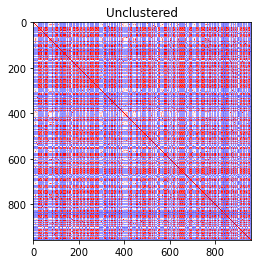

In [3]:
#check similarity matrix
gen_unclustered_similarity_matrix(title="Unclustered",Dsca=[Dsca])

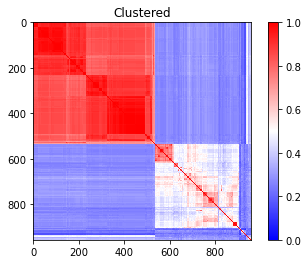

In [4]:
gen_clustered_similarity_matrix(title="Clustered", Dsca=[Dsca])

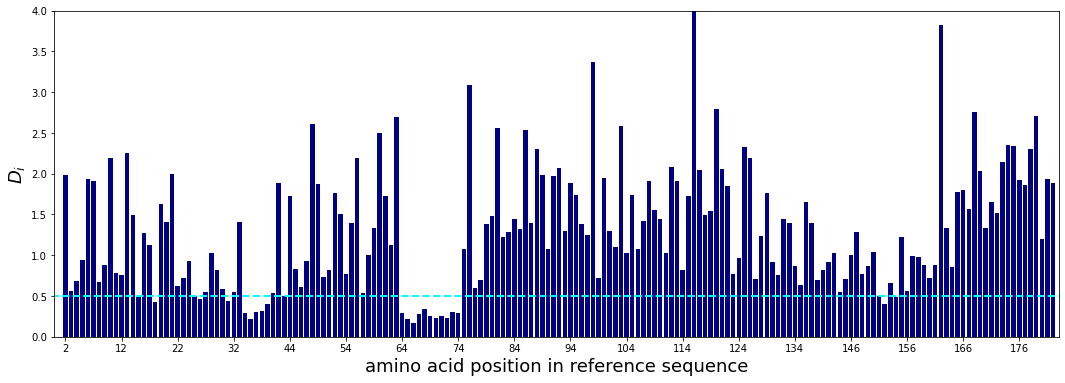

In [5]:
#Visualizing evolutionary conservation
gen_amino_acid_position_in_ref_sequence_graph(
    xlabel='amino acid position in reference sequence', 
    Dsca=[Dsca], 
    Dseq=[Dseq]
)

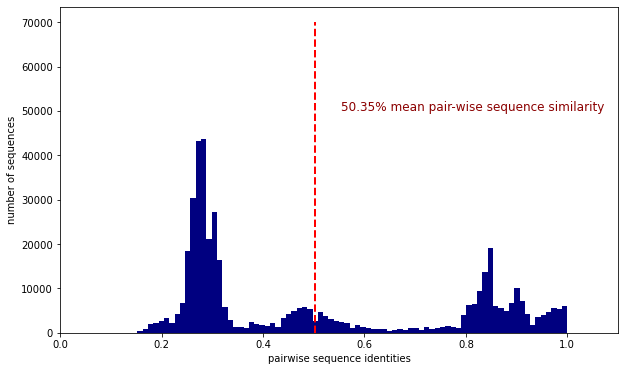

In [6]:
gen_pairwise_sequence_identities([Dseq],[Dsca])

Number of eigenmodes to keep is 6


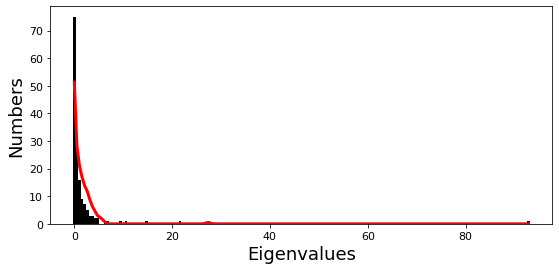

In [9]:
gen_eigenvalues_graph([Dseq],[Dsca],[Dsect])

In [10]:
annot = dict()
for i, h in enumerate(Dseq['hd']):
    hs = h.split('|')
    annot[hs[0]] = sca.Annot(hs[1], hs[2], hs[3].replace('.','')) 

In [11]:
# Most frequent taxonomic groups:
atleast = 1
for level in range(4):
    descr_list = [a.taxo.split(',')[level] for a in annot.values() \
                if len(a.taxo.split(',')) > level]
    descr_dict = {k:descr_list.count(k) for k in descr_list \
                if descr_list.count(k)>=atleast}
    print('\n Level %i:' % level)
    print(descr_dict)


 Level 0:
{'Eukaryota': 956}

 Level 1:
{'Metazoa': 544, 'Fungi': 408, 'Viridiplantae': 4}

 Level 2:
{'Chordata': 527, 'Dikarya': 395, 'Fungi incertae sedis': 11, 'Spiralia': 7, 'Ecdysozoa': 4, 'Placozoa': 4, 'Chlorophyta': 3, 'Echinodermata': 2, 'Streptophyta': 1}

 Level 3:
{'Craniata': 526, 'Ascomycota': 395, 'Mucoromycota': 9, 'Lophotrochozoa': 7, 'Arthropoda': 2, 'Trichoplacidae': 4, 'Mamiellophyceae': 2, 'Chytridiomycota': 2, 'core chlorophytes': 1, 'Tardigrada': 2, 'Eleutherozoa': 2, 'Klebsormidiophyceae': 1, 'Cephalochordata': 1}


In [12]:
phylo = list();
fam_names = ['Chordata', 'Fungi', 'Viridiplantae']
col = (0, 0.8, 0.38)
#Chordata = red, Fungi = purple, Viridiplantae = green,

for i,k in enumerate(fam_names):
    sf = sca.Unit()
    sf.name = fam_names[i].lower()
    sf.col = col[i]
    sf.items = [j for j,q in enumerate(Dseq['hd'])  if sf.name in q.lower()]
    phylo.append(sf)

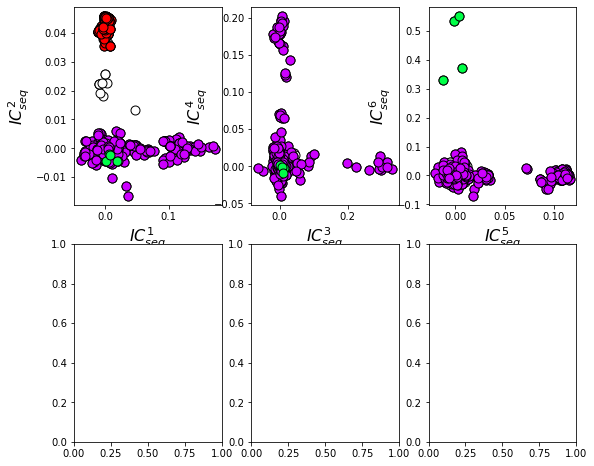

In [13]:
plt.rcParams['figure.figsize'] = 9, 8
U = Dsca['Uica'][1]
pairs = [[2*i,2*i+1] for i in range(3)]
for k,[k1,k2] in enumerate(pairs):
    plt.subplot(2,3,k+1)
    sca.figUnits(U[:,k1], U[:,k2], phylo)
    plt.xlabel(r"$IC_{seq}^{%i}$"%(k1+1), fontsize=16)
    plt.ylabel(r"$IC_{seq}^{%i}$"%(k2+1), fontsize=16)
    plt.subplot(2,3,k+4)